# Week 8
## Overview

It's the last time we meet in class for exercises! And to celebrate this mile-stone, I've put together an very nice little set of exercises. And if you're behind, don't worry. The workload is low!

  - Part A: First, we play around with sentiment analysis
  - That's it!


# Part A: Sentiment analysis

Sentiment analysis is another highly useful technique which we'll use to make sense of the Wiki
data. Further, experience shows that it might well be very useful when you get to the project stage of the class.



> **Video Lecture**: Uncle Sune talks about sentiment and his own youthful adventures.



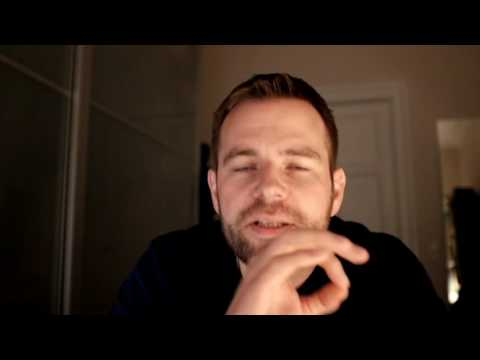

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("JuYcaYYlfrI",width=800, height=450)

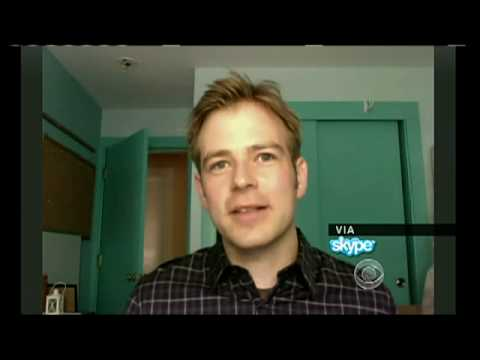

In [2]:
# There's also this one from 2010 with young Sune's research
YouTubeVideo("hY0UCD5UiiY",width=800, height=450)

> Reading: [Temporal Patterns of Happiness and Information in a Global Social Network: Hedonometrics and Twitter](http://journals.plos.org/plosone/article?id=10.1371/journal.pone.0026752) 


*Exercise*: Sentiment distribution. 
> 
> * Download the LabMT wordlist. It's available as supplementary material from [Temporal Patterns of Happiness and Information in a Global Social Network: Hedonometrics and Twitter](http://journals.plos.org/plosone/article?id=10.1371/journal.pone.0026752) (Data Set S1). Describe briefly how the list was generated.
> * Based on the LabMT word list, write a function that calculates sentiment given a list of tokens (the tokens should be lower case, etc).
> * Iterage over the nodes in your network, tokenize each page, and calculate sentiment every single page. Now you have sentiment as a new nodal property.
> * Calculate the average sentiment across all the pages. Also calculate the median, variance, 25th percentile, 75th percentile.
> * Remember histograms? Create a histogram of all of the artists's associated page-sentiments. (And make it a nice histogram - use your histogram making skills from Week 2). Add the mean, meadian, ect from above to your plot.
> * Who are the 10 artists with happiest and saddest pages?

<div class="alert alert-block alert-info">
As long as you get the plots right, it's OK to use LLM help here.
</div>



In [3]:
import pandas as pd

df = pd.read_csv('labmt.txt', sep='\t')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10222 entries, 0 to 10221
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   word                          10222 non-null  object 
 1   happiness_rank                10222 non-null  int64  
 2   happiness_average             10222 non-null  float64
 3   happiness_standard_deviation  10222 non-null  float64
 4   twitter_rank                  10222 non-null  object 
 5   google_rank                   10222 non-null  object 
 6   nyt_rank                      10222 non-null  object 
 7   lyrics_rank                   10222 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 639.0+ KB


In [11]:
def calculate_sentiment(tokens: list, word_scores: pd.DataFrame) -> float:
    """
    Calculate the average sentiment score of a list of tokens based on the provided word scores DataFrame.

    Parameters:
    tokens (list): A list of words (tokens) for which to calculate the sentiment.
    word_scores (pd.DataFrame): A DataFrame containing words and their corresponding sentiment scores.

    Returns:
    float: The average sentiment score of the tokens. Returns 0 if no tokens have a score.
    """
    # Convert the DataFrame to a dictionary for faster lookups
    word_score_dict = dict(zip(word_scores['word'], word_scores['happiness_average']))

    total_score = 0
    count = 0

    for token in tokens:
        if token in word_score_dict:
            total_score += word_score_dict[token]
            count += 1

    return total_score / count if count > 0 else 0

In [13]:
import networkx as nx
import os
from nltk.tokenize import word_tokenize
from tqdm import tqdm

# Load the graph
graph_path = "../Week4/rock_performers_graph.gexf"
G = nx.read_gexf(graph_path)

# Iterate over nodes and calculate sentiment
content_folder = "../Week4/content"
for node_id in tqdm(G.nodes):
    # Find the corresponding HTML page txt file
    file_path = os.path.join(content_folder, f"{node_id}.txt")
    if os.path.exists(file_path):
        with open(file_path, 'r', encoding='utf-8') as file:
            text = file.read()
        
        # Tokenize the text
        tokens = word_tokenize(text.lower())
        # print(f'Tokenized {node_id}: {len(tokens)}', end='\r')  # Print number of tokens for verification
        # Calculate sentiment
        sentiment = calculate_sentiment(tokens, df)
        # print(f'Calculated sentiment for {node_id}: {sentiment}', end='\r')  # Print sentiment for verification
        # Add sentiment as a nodal feature
        G.nodes[node_id]['sentiment'] = sentiment

# Save the updated graph
output_path = "./rock_performers_graph_sentiment.gexf"
nx.write_gexf(G, output_path)

100%|██████████| 485/485 [01:20<00:00,  6.06it/s]


Mean Sentiment: 5.485640958088458
Median Sentiment: 5.485594902948533
Variance: 0.001430311308246757
25th Percentile: 5.4619862574438525
75th Percentile: 5.508072512919954


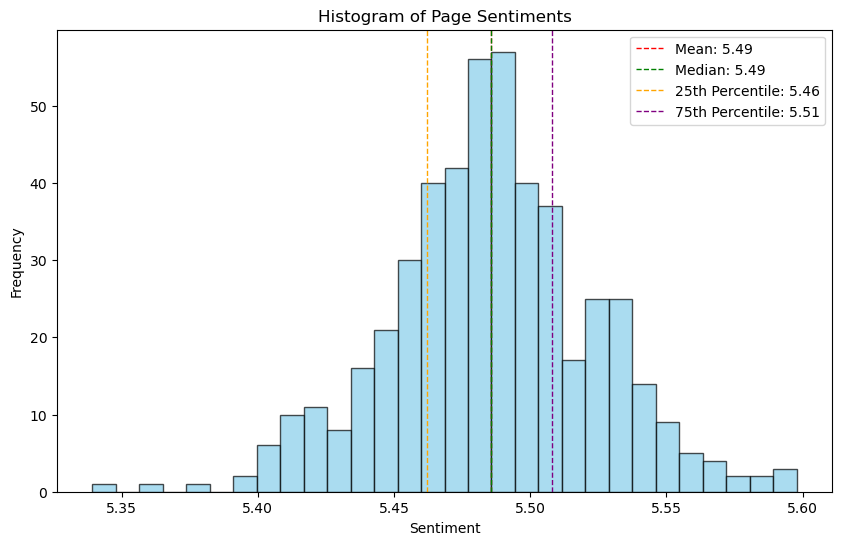

10 Saddest Artists:
Five_Finger_Death_Punch 5.339253908693132
Rage_Against_the_Machine 5.358653827589804
Rob_Zombie 5.373939242280398
Quiet_Riot 5.393716227554903
Canned_Heat 5.395937638213116
Traffic_(band) 5.399931086142283
Gary_Glitter 5.402677170589288
Drowning_Pool 5.40288112726717
Poison_(American_band) 5.404811468970925
No_Doubt 5.4058339136491105

10 Happiest Artists:
Air_Supply 5.568498791686759
Imagine_Dragons 5.569118134470019
Simple_Minds 5.570005341880715
Fun_(band) 5.573765361297617
Kenny_Loggins 5.575635852911066
Michael_Martin_Murphey 5.5852717510409
Train_(band) 5.5875156130998995
Lenny_Kravitz 5.590038381677717
The_Beach_Boys 5.591865110951487
Boys_Like_Girls 5.597888276795305


In [14]:
import numpy as np

import matplotlib.pyplot as plt

# Extract sentiment values from the graph
sentiments = [data['sentiment'] for _, data in G.nodes(data=True) if 'sentiment' in data]

# Calculate statistics
mean_sentiment = np.mean(sentiments)
median_sentiment = np.median(sentiments)
variance_sentiment = np.var(sentiments)
percentile_25 = np.percentile(sentiments, 25)
percentile_75 = np.percentile(sentiments, 75)

# Print statistics
print(f"Mean Sentiment: {mean_sentiment}")
print(f"Median Sentiment: {median_sentiment}")
print(f"Variance: {variance_sentiment}")
print(f"25th Percentile: {percentile_25}")
print(f"75th Percentile: {percentile_75}")

# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(sentiments, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(mean_sentiment, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_sentiment:.2f}')
plt.axvline(median_sentiment, color='green', linestyle='dashed', linewidth=1, label=f'Median: {median_sentiment:.2f}')
plt.axvline(percentile_25, color='orange', linestyle='dashed', linewidth=1, label=f'25th Percentile: {percentile_25:.2f}')
plt.axvline(percentile_75, color='purple', linestyle='dashed', linewidth=1, label=f'75th Percentile: {percentile_75:.2f}')
plt.title('Histogram of Page Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Find the 10 happiest and saddest artists
sorted_nodes = sorted(G.nodes(data=True), key=lambda x: x[1].get('sentiment', 0))
saddest_artists = sorted_nodes[:10]
happiest_artists = sorted_nodes[-10:]

print("10 Saddest Artists:")
for artist in saddest_artists:
    print(artist[0], artist[1].get('sentiment', 0))

print("\n10 Happiest Artists:")
for artist in happiest_artists:
    print(artist[0], artist[1].get('sentiment', 0))

*Exercise*: Community sentiment distribution. 
  
> * Last week we calculated the stuctural communities of the graph. For this exercise, we use those communities (just the 10 largest ones, or all your communities if you have fewer than 10). Specifically, you should calculate the average the average sentiment of the nodes in each community to find a *community level sentiment*. 
>   - Name each community by its three most connected bands. (Or feed the list of bands in each community and ask the LLM to come up with a good name for the community).
>   - What are the three happiest communities? (or the two happiest if you have 5 or fewer communities)
>   - what are the three saddest communities? (or the two happiest if you have 5 or fewer communities)
>   - Do these results confirm what you can learn about each community by comparing to the genres, checking out the word-clouds for each community, and reading the wiki-pages? 
> * Compare the sentiment of the happiest and saddest communities to the overall (entire network) distribution of sentiment that you calculated in the previous exercise. Are the communities very differenct from the average? Or do you find the sentiment to be quite similar across all of the communities?

<div class="alert alert-block alert-info">
As above, feel free to go nuts with help from an LLM with this exercise for the technical parts. But try to answer the questions about interpreting the results with your own human brain.
</div>

**Note**: Calculating sentiment may take a long time, so arm yourself with patience as your code runs (remember to check that it runs correctly, before waiting patiently). Further, these tips may speed things up. And save somewhere, so you don't have to start over.

**Tips for speed**
* If you use `freqDist` prior to finding the sentiment, you only have to find it for every unique word and hereafter you can do a weighted mean.
* More tips for speeding up loops https://wiki.python.org/moin/PythonSpeed/PerformanceTips#Loops

In [15]:
import json
from collections import Counter

# Load the communities
with open('../Week7/louvain_comms.json', 'r') as file:
    communities = json.load(file)

# Calculate community-level sentiment
community_sentiments = []
for community in communities:
    community_sentiment = [G.nodes[band_id]['sentiment'] for band_id in community if 'sentiment' in G.nodes[band_id]]
    avg_sentiment = np.mean(community_sentiment) if community_sentiment else 0
    community_sentiments.append((community, avg_sentiment))

# Sort communities by average sentiment
community_sentiments.sort(key=lambda x: x[1])

# Save the new json along with average sentiments
community_sentiments_serializable = [{
    'community': community,
    'average_sentiment': avg_sentiment
} for community, avg_sentiment in community_sentiments]

with open('louvain_comms_sentiments.json', 'w') as file:
    json.dump(community_sentiments_serializable, file)

In [16]:
# Name each community by its three most connected bands
community_names = []
for community, _ in community_sentiments:
    band_degrees = [(band_id, G.degree(band_id)) for band_id in community]
    top_bands = sorted(band_degrees, key=lambda x: x[1], reverse=True)[:3]
    top_band_names = [band[0] for band in top_bands]
    community_names.append(top_band_names)

# Find the happiest and saddest communities
happiest_communities = community_sentiments[-3:]
saddest_communities = community_sentiments[:3]

# Print results
print("Happiest Communities:")
for i, (community, sentiment) in enumerate(happiest_communities, 1):
    print(f"{i}. Bands: {community_names[communities.index(community)]}, Sentiment: {sentiment:.2f}")

print("\nSaddest Communities:")
for i, (community, sentiment) in enumerate(saddest_communities, 1):
    print(f"{i}. Bands: {community_names[communities.index(community)]}, Sentiment: {sentiment:.2f}")

# Compare to overall sentiment
print("\nComparison to Overall Sentiment:")
print(f"Overall Mean Sentiment: {mean_sentiment:.2f}")
print(f"Variance: {variance_sentiment:.2f}")
for i, (community, sentiment) in enumerate(happiest_communities + saddest_communities, 1):
    print(f"Community {i} Sentiment: {sentiment:.2f}, Difference from Mean: {sentiment - mean_sentiment:.2f}")

Happiest Communities:
1. Bands: ['Tommy_James_and_the_Shondells'], Sentiment: 5.50
2. Bands: ['Nickelback', 'Daughtry_(band)', 'Stone_Temple_Pilots'], Sentiment: 5.50
3. Bands: ['U2', 'Aerosmith', 'Coldplay'], Sentiment: 5.51

Saddest Communities:
1. Bands: ['Black_Sabbath', 'Metallica', 'Korn'], Sentiment: 5.44
2. Bands: ['The_Beatles', 'Led_Zeppelin', 'The_Rolling_Stones'], Sentiment: 5.47
3. Bands: ['Red_Hot_Chili_Peppers', 'Green_Day', 'Foo_Fighters'], Sentiment: 5.48

Comparison to Overall Sentiment:
Overall Mean Sentiment: 5.49
Variance: 0.00
Community 1 Sentiment: 5.50, Difference from Mean: 0.01
Community 2 Sentiment: 5.50, Difference from Mean: 0.01
Community 3 Sentiment: 5.51, Difference from Mean: 0.03
Community 4 Sentiment: 5.44, Difference from Mean: -0.05
Community 5 Sentiment: 5.47, Difference from Mean: -0.02
Community 6 Sentiment: 5.48, Difference from Mean: -0.01
